<a href="https://colab.research.google.com/github/NouraSami/CNN-Poses-Classifier/blob/main/CNNPosesClassifier.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
from tensorflow.compat.v1 import ConfigProto
from tensorflow.compat.v1 import InteractiveSession

config = ConfigProto()
config.gpu_options.per_process_gpu_memory_fraction = 0.5
config.gpu_options.allow_growth = True
session = InteractiveSession(config=config)

In [ ]:
from tensorflow.keras.layers import Input, Lambda, Dense, Flatten
from tensorflow.keras.models import Model
from tensorflow.keras.applications.inception_v3 import InceptionV3
#from keras.applications.inception_v3 import VGG16
from tensorflow.keras.applications.inception_v3 import preprocess_input
from tensorflow.keras.preprocessing import image
from tensorflow.keras.preprocessing.image import ImageDataGenerator, load_img
from tensorflow.keras.models import Sequential
import numpy as np
from glob import glob 

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
PATH = '/content/drive/MyDrive/Dataset/Poses'

In [ ]:
import os

In [ ]:
os.listdir(PATH)

['test', 'train']

In [ ]:
train_dir = os.path.join(PATH,
                         'train')
test_dir = os.path.join(PATH,
                        'test')

In [ ]:
os.listdir(train_dir)

['Sitting', 'WithAPet', 'CloseShot']

In [ ]:
train_Sitting_dir = os.path.join(train_dir,
                                'Sitting')
train_WithAPet_dir = os.path.join(train_dir,
                                   'WithAPet')
train_CloseShot_dir = os.path.join(train_dir,
                               'CloseShot')

test_Sitting_dir = os.path.join(test_dir,
                               'Sitting')
test_WithAPet_dir = os.path.join(test_dir,
                                  'WithAPet')
test_CloseShot_dir = os.path.join(test_dir,
                              'CloseShot')

In [ ]:
print(len(os.listdir(train_Sitting_dir)))
print(len(os.listdir(train_WithAPet_dir)))
print(len(os.listdir(train_CloseShot_dir)))

100
100
101


In [ ]:
print(len(os.listdir(test_Sitting_dir)))
print(len(os.listdir(test_WithAPet_dir)))
print(len(os.listdir(test_CloseShot_dir)))

16
21
18


In [ ]:
IMG_HEIGHT = 224
IMG_WIDTH = 224
batch_size = 32

image_gen = ImageDataGenerator(
    rescale=1./255
    )

In [ ]:
train_data_gen = image_gen.flow_from_directory(
    #batch_size=batch_size,
    directory=train_dir,
    shuffle=True,
    target_size=(IMG_HEIGHT, IMG_WIDTH),
    class_mode='categorical')

Found 300 images belonging to 3 classes.


In [ ]:
test_data_gen = image_gen.flow_from_directory(
    #batch_size=batch_size,
    directory=test_dir,
    target_size=(IMG_HEIGHT, IMG_WIDTH),
    class_mode='categorical')

Found 54 images belonging to 3 classes.


In [ ]:
sample_training_images, _ = next(train_data_gen)

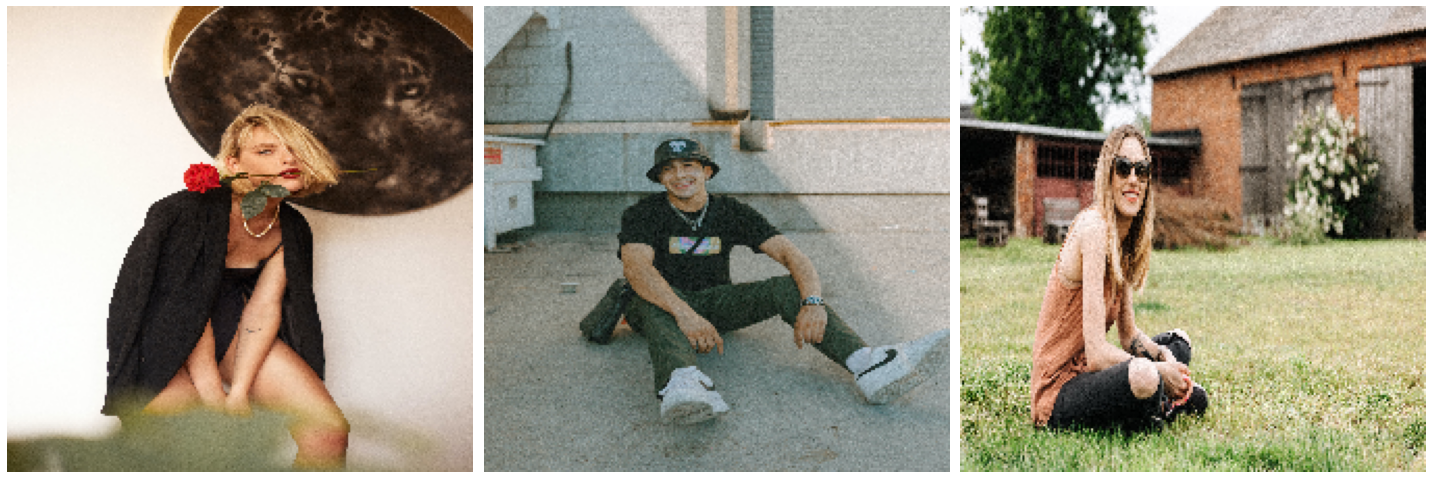

In [ ]:
import matplotlib.pyplot as plt

# Create images with white backgrounds
import plotly.io as pio
pio.templates.default = 'plotly_white'

# This function will plot images in the form of a grid with 1 row and 5 columns where images are placed in each column.
def plotImages(images_arr):
    fig, axes = plt.subplots(1, 3, figsize=(20,20))
    axes = axes.flatten()
    for img, ax in zip( images_arr, axes):
        ax.imshow(img)
        ax.axis('off')
    plt.tight_layout()
    plt.show()



plotImages(sample_training_images[:3])

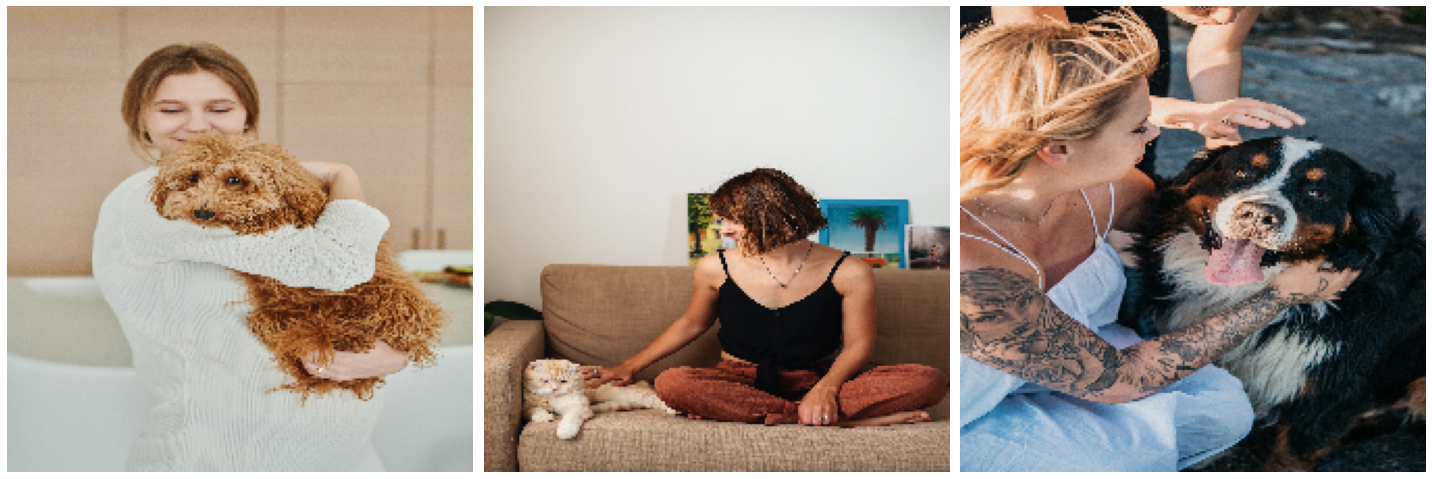

In [ ]:
plotImages(sample_training_images[3:6])

In [ ]:
import tensorflow as tf
tf.__version__

'2.8.0'

In [ ]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Conv2D, Flatten, Dropout, MaxPooling2D
from tensorflow.keras.preprocessing.image import ImageDataGenerator

model = Sequential([
    Conv2D(16, 3, padding='same', activation='relu', input_shape=(IMG_HEIGHT, IMG_WIDTH, 3)),
    MaxPooling2D(),
    Dropout(0.2),
    Conv2D(32, 3, padding='same', activation='relu'),
    MaxPooling2D(),
    Conv2D(64, 3, padding='same', activation='relu'),
    MaxPooling2D(),
    Dropout(0.2),
    Conv2D(128, 3, padding='same', activation='relu'),
    MaxPooling2D(),
    Dropout(0.2),
    Conv2D(128, 3, padding='same', activation='relu'),
    MaxPooling2D(),
    Dropout(0.2),
    Flatten(),
    Dense(512, activation='relu'),
    Dense(3, activation='softmax')
])

In [ ]:
model.compile(optimizer='adam',
              loss='categorical_crossentropy',
              metrics=['accuracy'])

In [ ]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 224, 224, 16)      448       
                                                                 
 max_pooling2d (MaxPooling2D  (None, 112, 112, 16)     0         
 )                                                               
                                                                 
 dropout (Dropout)           (None, 112, 112, 16)      0         
                                                                 
 conv2d_1 (Conv2D)           (None, 112, 112, 32)      4640      
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 56, 56, 32)       0         
 2D)                                                             
                                                                 
 conv2d_2 (Conv2D)           (None, 56, 56, 64)        1

In [ ]:
epochs = 200 # Please try to raiseraise this number to reach thousend if you can which is the number of trains circuls

In [ ]:
total_train = len(os.listdir(train_Sitting_dir)) + len(os.listdir(train_WithAPet_dir)) + len(os.listdir(train_CloseShot_dir))
total_test = len(os.listdir(test_Sitting_dir)) + len(os.listdir(test_WithAPet_dir)) + len(os.listdir(test_CloseShot_dir))

In [ ]:
history = model.fit(
    train_data_gen,
    steps_per_epoch=total_train // batch_size,
    epochs=epochs,
    validation_data=test_data_gen,
    validation_steps=total_test // batch_size#, 
    #callbacks = [tf.keras.callbacks.EarlyStopping(
     #   monitor='val_loss',
      #  mode='min',
       # min_delta=0.01,
        #patience=10
    #)]
)

Epoch 1/200
9/9 [==============================] - 257s 29s/step - loss: 1.4003 - accuracy: 0.3134 - val_loss: 1.0985 - val_accuracy: 0.3750
Epoch 2/200
9/9 [==============================] - 144s 16s/step - loss: 1.0995 - accuracy: 0.3470 - val_loss: 1.0956 - val_accuracy: 0.5938
Epoch 3/200
9/9 [==============================] - 147s 17s/step - loss: 1.0988 - accuracy: 0.3134 - val_loss: 1.0965 - val_accuracy: 0.4375
Epoch 4/200
9/9 [==============================] - 144s 16s/step - loss: 1.0999 - accuracy: 0.3321 - val_loss: 1.0916 - val_accuracy: 0.3125
Epoch 5/200
9/9 [==============================] - 144s 16s/step - loss: 1.0961 - accuracy: 0.3246 - val_loss: 1.0852 - val_accuracy: 0.6250
Epoch 6/200
9/9 [==============================] - 144s 16s/step - loss: 1.0834 - accuracy: 0.3993 - val_loss: 1.0943 - val_accuracy: 0.3750
Epoch 7/200
9/9 [==============================] - 145s 16s/step - loss: 1.0671 - accuracy: 0.4590 - val_loss: 1.0922 - val_accuracy: 0.4062
Epoch 8/200
9

In [ ]:
import plotly.graph_objects as go
fig = go.Figure()

fig.add_trace(go.Scatter(x=history.epoch,
                         y=history.history['accuracy'],
                         mode='lines+markers',
                         name='Training accuracy'))
fig.add_trace(go.Scatter(x=history.epoch,
                         y=history.history['val_accuracy'],
                         mode='lines+markers',
                         name='Validation accuracy'))
fig.update_layout(title='Accuracy',
                  xaxis=dict(title='Epoch'),
                  yaxis=dict(title='Percentage'))
fig.show()

In [ ]:
!mkdir -p saved_model
model.save('/content/drive/MyDrive/Models/Poses/Poses.h5')